In [1]:
import matplotlib.pyplot as plt
import numpy as np
from image_generation import generate_test_image, mycomputeColor, mycolorwheel
from conjugate_gradient import cg_main, OF_cg
from multigrid import multigrid_main, V_cycle
from preprocessing import calculate_image_derivatives, preprocess_image, get_rhs
from PCG import pcg_main, OF_pcg


## Generate test images

In [ ]:
n = 2**6
test_case_1 = generate_test_image(n, testcase=1)
test_case_2 = generate_test_image(n, testcase=2)

## Conjugate gradient

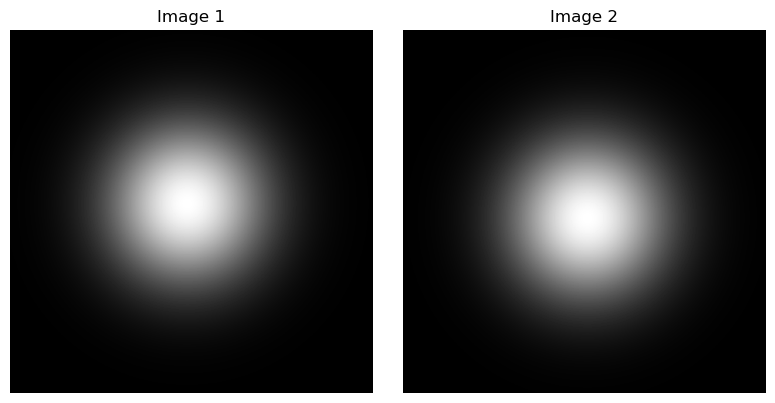

In [15]:

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(test_case_1[0], cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis('off')

axes[1].imshow(test_case_1[1], cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis('off')

plt.tight_layout()
plt.show()

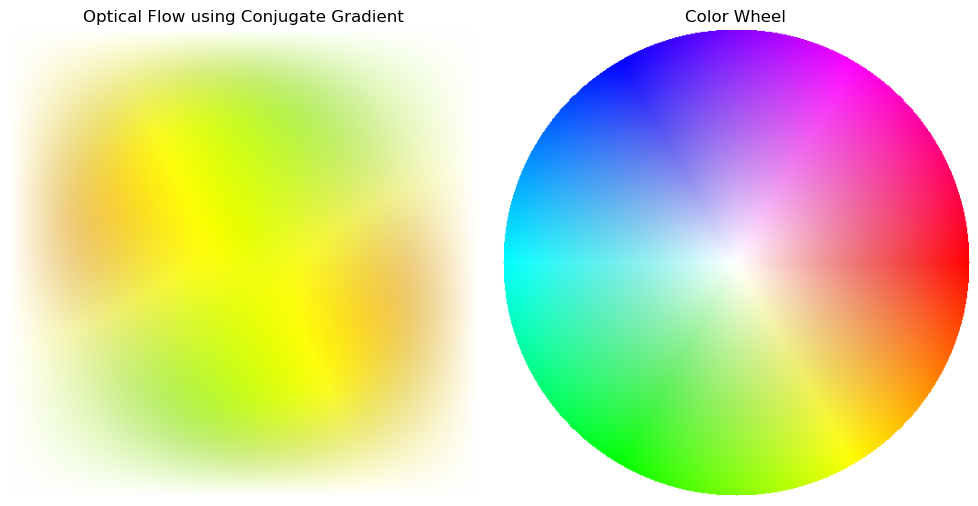

CG converged in 744 iterations with residual norm 1.19e+04


In [16]:

reg = 4**(8-4)

Ix, Iy, It = calculate_image_derivatives(test_case_1[0], test_case_1[1])
rhs_u, rhs_v = get_rhs(Ix, Iy, It)
u0 = np.zeros_like(rhs_u)
v0 = np.zeros_like(rhs_v)

u_cg, v_cg, residuals_cg, max_iter_cg = OF_cg(u0, v0, Ix, Iy, reg, rhs_u, rhs_v, tol=1e-8, maxit=2000)

of_img = mycomputeColor(u_cg, v_cg)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()

res_cg = residuals_cg[-1]
print(f"CG converged in {max_iter_cg} iterations with residual norm {res_cg:.2e}")

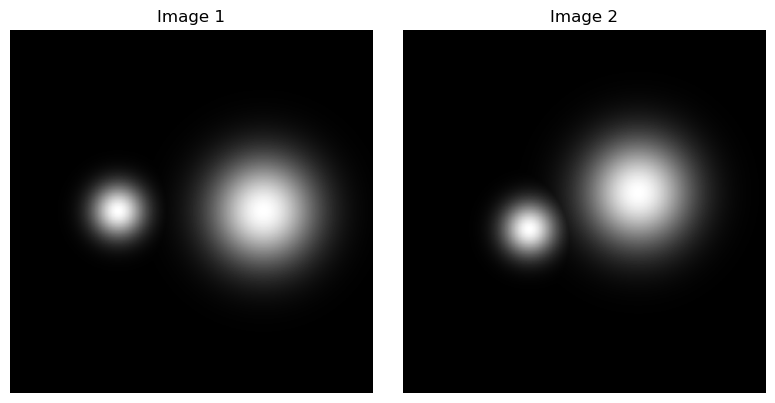

In [17]:
# Plotting below made by LLM
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(test_case_2[0], cmap='gray')
axes[0].set_title("Image 1")
axes[0].axis('off')

axes[1].imshow(test_case_2[1], cmap='gray')
axes[1].set_title("Image 2")
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [3]:

reg = 4**(6-4)

Ix, Iy, It = calculate_image_derivatives(test_case_2[0], test_case_2[1])
rhs_u, rhs_v = get_rhs(Ix, Iy, It)
u0 = np.zeros_like(rhs_u)
v0 = np.zeros_like(rhs_v)

u_cg, v_cg, residuals_cg, max_iter_cg = OF_cg(u0, v0, Ix, Iy, reg, rhs_u, rhs_v, tol=1e-8, maxit=2000)

of_img = mycomputeColor(u_cg, v_cg)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()

res_cg = residuals_cg[-1]
print(f"CG converged in {max_iter_cg} iterations with residual norm {res_cg:.2e}")

NameError: name 'test_case_2' is not defined

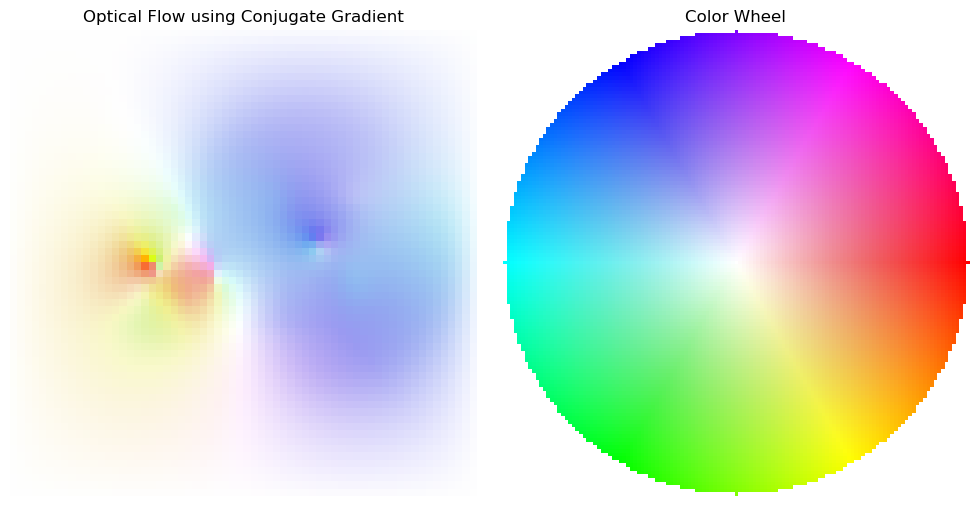

In [2]:
n = 2**6
test_case_2 = generate_test_image(n, testcase=2)
reg = 4**(6-4)

u, v = multigrid_main(test_case_2[0], test_case_2[1], reg, 3, 3, 3  )
of_img = mycomputeColor(u, v)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()


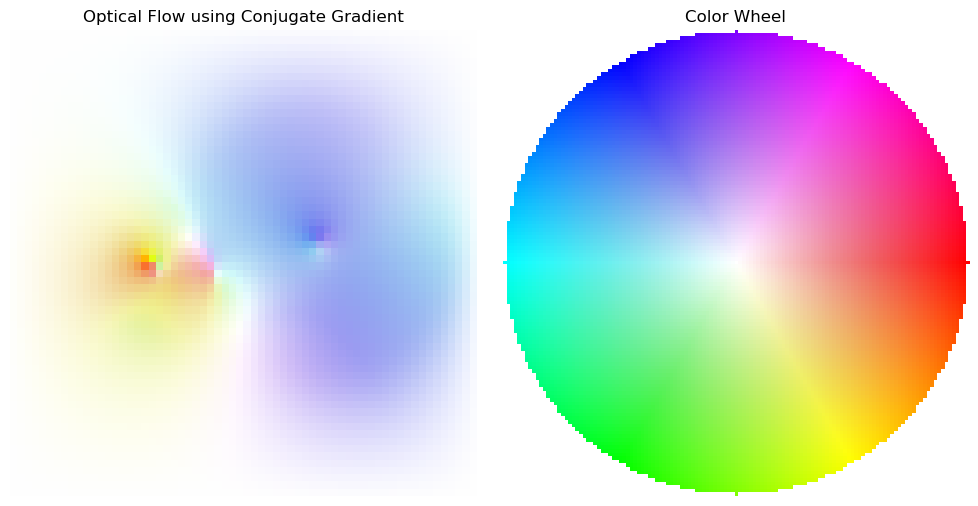

In [4]:
n = 2**6
test_case_2 = generate_test_image(n, testcase=2)
reg = 4**(6-4)

u, v, res, max_iter, elapsed_time = pcg_main(test_case_2[0], test_case_2[1], reg, 3, 3, 3  )
of_img = mycomputeColor(u, v)
color_wheel = mycolorwheel(n)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Left plot: optical flow image
axs[0].imshow(of_img)
axs[0].set_title("Optical Flow using Conjugate Gradient")
axs[0].axis('off')

# Right plot: color wheel
axs[1].imshow(color_wheel)
axs[1].set_title("Color Wheel")
axs[1].axis('off')

plt.tight_layout()
plt.show()



Running test for k = 6 (N = 64)

Running test for k = 7 (N = 128)

Running test for k = 8 (N = 256)

Running test for k = 9 (N = 512)

Elapsed times (seconds):
k = 6: 0.9805 s
k = 7: 0.6171 s
k = 8: 1.5405 s
k = 9: 12.1216 s


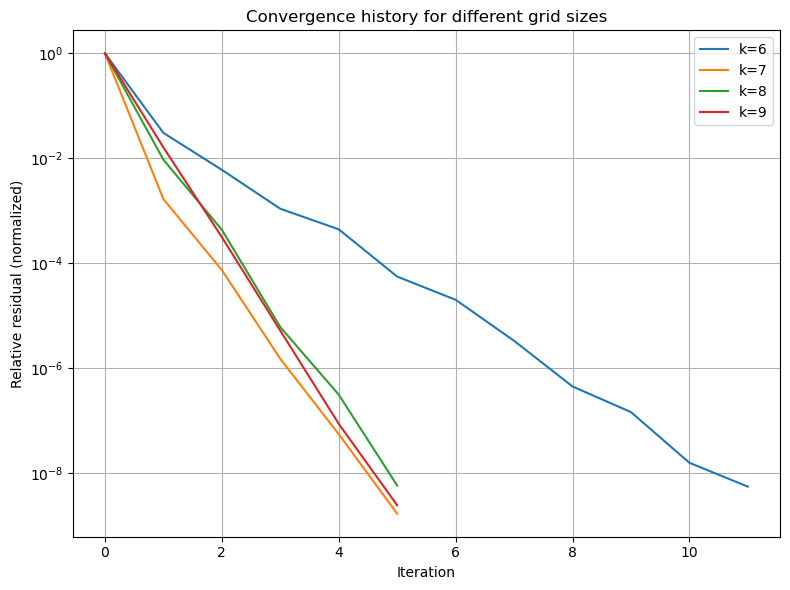

In [8]:
ks = range(6, 10)

# Storage
times = []
residuals = []

for k in ks:
    print(f"\nRunning test for k = {k} (N = {2**k})")
    reg = 4 ** (k - 4)
    N = 2 ** k

    # Generate synthetic image pair
    I1, I2 = generate_test_image(N, testcase=2)

    # Run CG solver
    u, v, res, max_iter, elapsed_time = pcg_main(I1, I2, reg, max_level=1, s1=5, s2=5, tol=1e-8, maxit=2000)

    # Normalize residuals by their first entry
    res = np.array(res) / res[0]

    # Store data
    times.append(elapsed_time)
    residuals.append(res)

# Print timing results
print("\nElapsed times (seconds):")
for k, t in zip(ks, times):
    print(f"k = {k}: {t:.4f} s")

# Plot all residual histories together
plt.figure(figsize=(8, 6))
for k, res in zip(ks, residuals):
    plt.plot(res, label=f"k={k}")

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Relative residual (normalized)")
plt.title("Convergence history for different grid sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Elapsed times (seconds):


C:\Users\vikto\AppData\Local\Temp\ipykernel_17248\1882919003.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


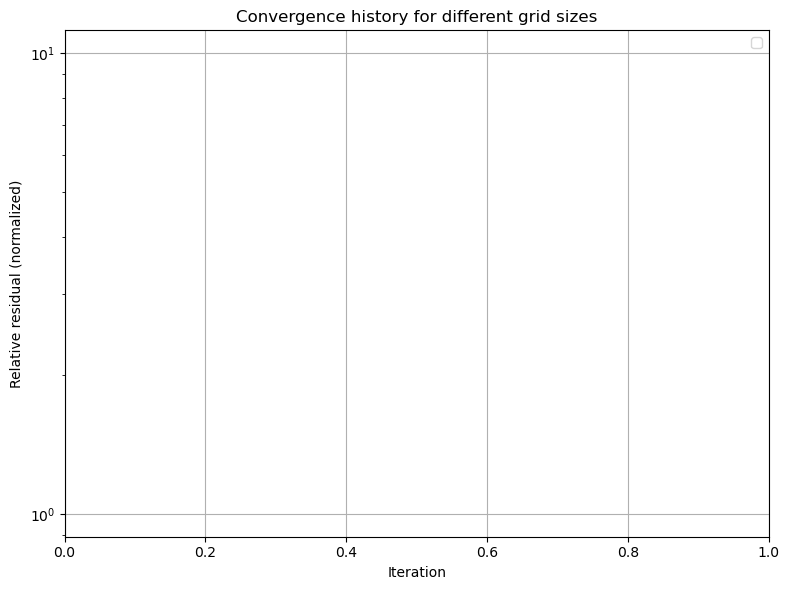

In [3]:
# Print timing results
print("\nElapsed times (seconds):")
for k, t in zip(ks[:-1], times[:-1]):
    print(f"k = {k}: {t:.4f} s")

# Plot all residual histories together
plt.figure(figsize=(8, 6))
for k, res in zip(ks, residuals):
    plt.plot(res, label=f"k={k}")

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Relative residual (normalized)")
plt.title("Convergence history for different grid sizes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()